In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
# Importing data frame
df= pd.read_csv("data/boston.csv")

In [3]:
#testing data frame
print(df.head(1))

      CRIM    ZN  NDUS  CHAS    NOX     RM   AGE   DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0  2.31     0  0.538  6.575  65.2  4.09    1  296     15.3   

       B  LSTAT  MEDV  
0  396.9   4.98  24.0  


In [4]:
#testing data frame
df.at[3,"NOX"]

0.458

## Looking for best predictor of NOX (nitric oxides concentration)

In [5]:
# Calculating each correlation to NOX
print("The correlation between:\n")
corrCRIM = np.corrcoef(df.CRIM, df.NOX)[0,1]
print("NOX and CRIM is",corrCRIM.round(2))

corrZN = np.corrcoef(df.ZN, df.NOX)[0,1]
print("NOX and ZN is",corrZN.round(2))

corrNDUS = np.corrcoef(df.NDUS, df.NOX)[0,1]
print("NOX and NDUS is",corrNDUS.round(2))

corrCHAS = np.corrcoef(df.CHAS, df.NOX)[0,1]
print("NOX and CHAS is",corrCHAS.round(2))

corrRM = np.corrcoef(df.RM, df.NOX)[0,1]
print("NOX and RM is",corrRM.round(2))

corrAGE = np.corrcoef(df.AGE, df.NOX)[0,1]
print("NOX and AGE is",corrAGE.round(2))

corrDIS = np.corrcoef(df.DIS, df.NOX)[0,1]
print("NOX and DIS is",corrDIS.round(2))

corrRAD = np.corrcoef(df.RAD, df.NOX)[0,1]
print("NOX and RAD is",corrRAD.round(2))

corrTAX = np.corrcoef(df.TAX, df.NOX)[0,1]
print("NOX and TAX is",corrTAX.round(2))

corrPTRATIO = np.corrcoef(df.PTRATIO, df.NOX)[0,1]
print("NOX and PTRATIO is",corrPTRATIO.round(2))

corrB = np.corrcoef(df.B, df.NOX)[0,1]
print("NOX and B is",corrB.round(2))

corrLSTAT = np.corrcoef(df.LSTAT, df.NOX)[0,1]
print("NOX and LSTAT is",corrLSTAT.round(2))

corrMEDV = np.corrcoef(df.MEDV, df.NOX)[0,1]
print("NOX and MEDV is",corrMEDV.round(2))

The correlation between:

NOX and CRIM is 0.42
NOX and ZN is -0.52
NOX and NDUS is 0.76
NOX and CHAS is 0.09
NOX and RM is -0.3
NOX and AGE is 0.73
NOX and DIS is -0.77
NOX and RAD is 0.61
NOX and TAX is 0.67
NOX and PTRATIO is 0.19
NOX and B is -0.38
NOX and LSTAT is 0.59
NOX and MEDV is -0.43


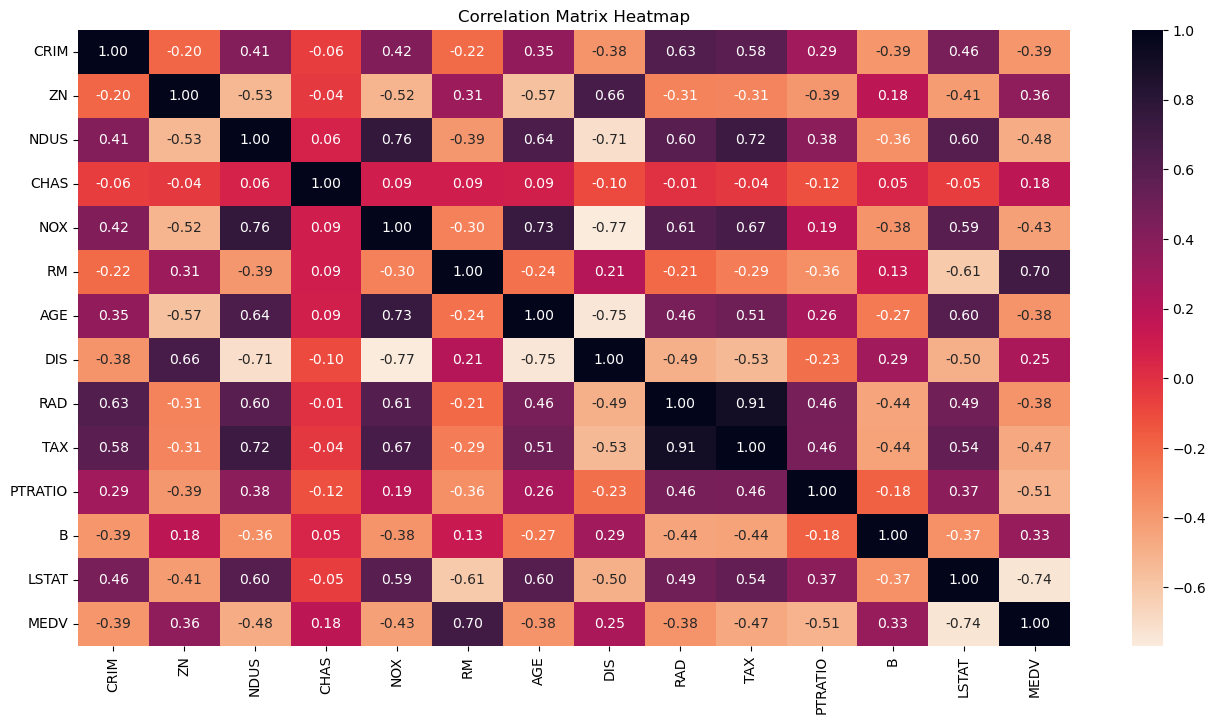

In [6]:
#Evaluating all variables at the same time
# Making a correlation matrix
corrMatrix = df.corr()

# Plotting as a heat map 
rocket_r_cmap = sns.color_palette("rocket_r", as_cmap=True)
plt.figure(figsize=(16, 8)) 
sns.heatmap(corrMatrix, annot=True, fmt=".2f", cmap=rocket_r_cmap, cbar=True)

plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

## Selecting the variables that have a correlation to NOX above 0.6 for visualizing a scatter plot and regression. They are: NDUS, AGE, DIS, RAD, and TAX 

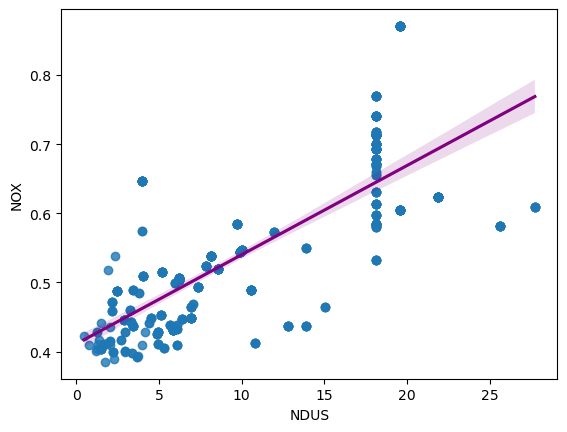

In [7]:
#NOX = nitric oxides concentration
#NDUS = proportion of non-retail business acres per town
sns.regplot(x='NDUS', y='NOX', data=df, line_kws={"color": "purple"})
plt.show()

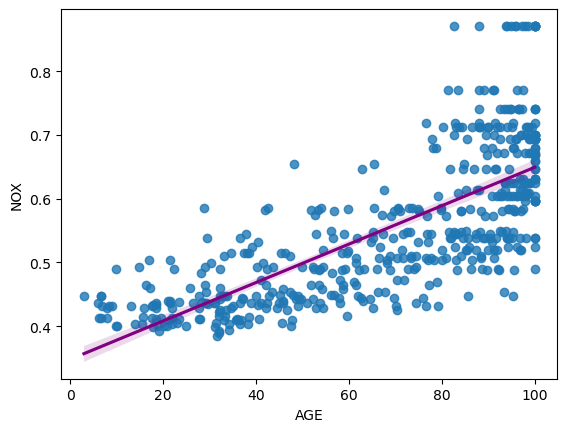

In [8]:
#NOX = nitric oxides concentration
#AGE = proportion of owner-occupied units built prior to 1940
sns.regplot(x='AGE', y='NOX', data=df, line_kws={"color": "purple"})
plt.show()

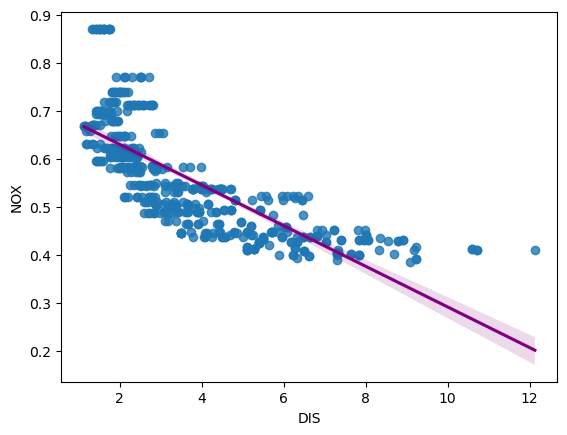

In [9]:
#NOX = nitric oxides concentration
#DIS = weighted distances to five Boston employment centers
sns.regplot(x='DIS', y='NOX', data=df, line_kws={"color": "purple"})
plt.show()

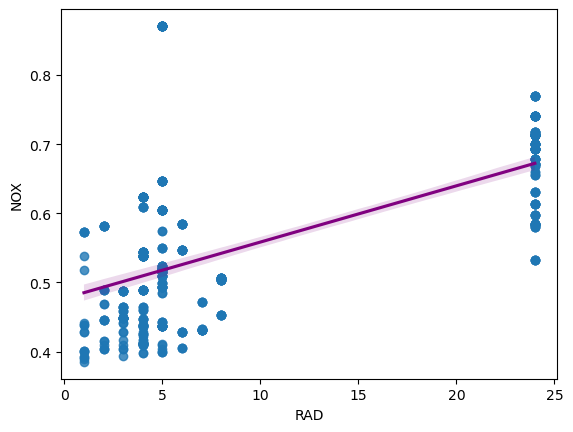

In [10]:
#NOX = nitric oxides concentration
#RAD = index of accessibility to radial highways
sns.regplot(x='RAD', y='NOX', data=df, line_kws={"color": "purple"})
plt.show()

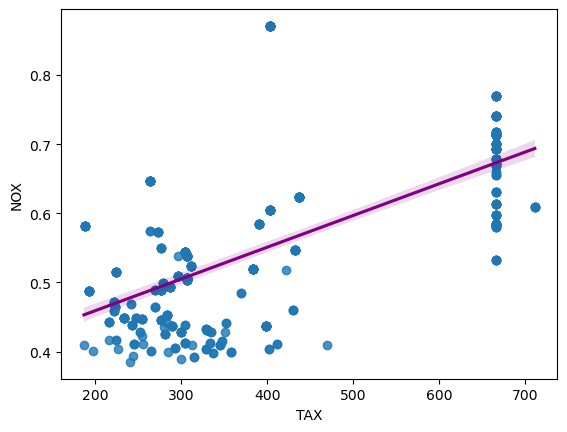

In [11]:
#NOX = nitric oxides concentration
#TAX = full-value property-tax rate per $10,000
sns.regplot(x='TAX', y='NOX', data=df, line_kws={"color": "purple"})
plt.show()

### AGE and DIS appears to be variables to best predictor of NOX 

In [12]:
# Calculate linear regression values for AGE, where AGE is the constant 
X = sm.add_constant(df["AGE"])
Y = df["NOX"]

# OLS method used for estimating the linear regression
model = sm.OLS(Y, X).fit()  

# Printing
print("Slope:", model.params[1])
print("Intercept:", model.params[0])
print(model.summary())

Slope: 0.003011171721007329
Intercept: 0.34820425606707284
                            OLS Regression Results                            
Dep. Variable:                    NOX   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     580.0
Date:                Fri, 09 May 2025   Prob (F-statistic):           7.45e-86
Time:                        18:32:33   Log-Likelihood:                 566.81
No. Observations:                 506   AIC:                            -1130.
Df Residuals:                     504   BIC:                            -1121.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

#### From the visualizations, AGE has a high correlation to NOX 0.73 and the linear regression analysis suggest a significant relationship . 

The positive slope of 0.0030 indicates a positive relationship between AGE and NOX; areas with a higher proportion of older buildings tend to have higher concentrations of nitric oxides. 
The model has an R-squared value of 0.535, suggesting that 53.5% of the variance in NOX levels is directly related to AGE. 
The model's F-statistic is 580.0, with a very low p-value (7.45e-86), indicating the model is highly significant. 
The small confidence intervals for both the slope and intercept suggest high precision in these estimates.

In [13]:
# Calculate linear regression values for DIS, where DIS is the constant 
X = sm.add_constant(df["DIS"])
Y = df["NOX"]

# OLS method used for estimating the linear regression
model = sm.OLS(Y, X).fit()  

# Printing
print("Slope:", model.params[1])
print("Intercept:", model.params[0])
print(model.summary())

Slope: -0.04233089656877708
Intercept: 0.7153426187776512
                            OLS Regression Results                            
Dep. Variable:                    NOX   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     730.4
Date:                Fri, 09 May 2025   Prob (F-statistic):          4.23e-100
Time:                        18:32:33   Log-Likelihood:                 599.69
No. Observations:                 506   AIC:                            -1195.
Df Residuals:                     504   BIC:                            -1187.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

#### From the visualizations, DIS has a high correlation to NOX -0.77 and the linear regression analysis also suggest a significant negative relationship. 

The slope of -0.0423 indicates a negative relationship between DIS and NOX; as the distance to employment centers increases, the concentration of nitric oxides tends to decrease. 
R-squared of 0.592 shows that this model explains 59.2% of the variance in NOX concentrations, which is a considerable proportion, indicating that DIS is a good predictor of NOX.
The F-statistic (730.4) and its associated p-value (4.23e-100) indicate that the model is statistically significant. 
The confidence intervals for both the slope and intercept are small, indicating a high level of precision in these estimates.